In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Get DSCI521-project/data directory
current_dir = os.getcwd()
parent = os.path.dirname(current_dir)

# Read csv file 
dataset = pd.read_csv(parent+"/data/heart_disease_uci.csv", sep = ",", header = 0)

# Ensure dataset was loaded
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Demographic Data Exhibition

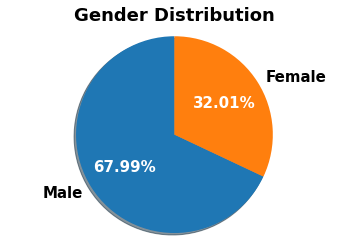

In [3]:
# Gender 
# 1 - male, 0 - female
gender = dataset["sex"].tolist()
total_count = len(dataset)
male_count = sum(a for a in gender if a)
female_count = total_count - male_count

labels = "Male","Female"
percent = [male_count/total_count, female_count/total_count]

# fig1, ax1 = plt.figure(figsize=(15,4))
fig1, ax1 = plt.subplots()
patches, texts, autotexts  = ax1.pie(percent, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

ax1.set_title("Gender Distribution", fontsize = 18, fontweight = "bold")

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [4]:
# help(ax1.pie)

# Age Distribution

In [5]:
# Age 
age_ls = dataset["age"].tolist()

min_age, max_age = dataset["age"][dataset["age"].idxmin].item(), dataset["age"][dataset["age"].idxmax].item()

In [6]:
print("Maximum age: "+ str(max_age))
print("Minimum age: "+ str(min_age))

Maximum age: 77
Minimum age: 29


In [7]:
age_dict = Counter()
labels = []
# 1 - 
age_groups_dict = Counter()
for age in age_ls:
    age_dict[age] += 1
    
sorted_age_dict = dict(sorted(age_dict.items(), key = lambda x: x[0]))
keys = set(sorted_age_dict.keys())

for i, age in enumerate(range(min_age, max_age, 5)):
    labels.append(str(age)+"-"+str(age+4))
    for index in range(age,age+5,1):
        if index in keys:
            age_groups_dict[i] += sorted_age_dict[index]

count = [value for value in age_groups_dict.values()]

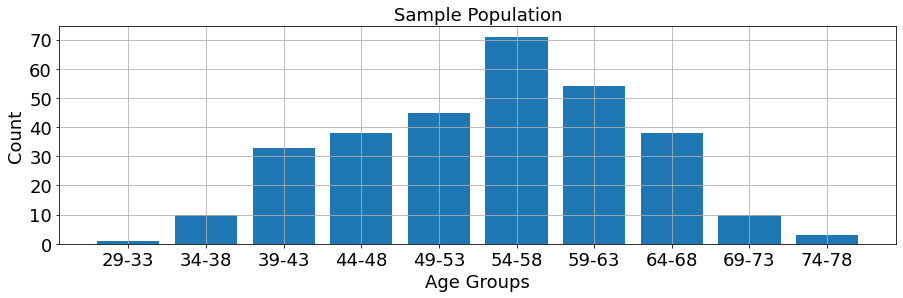

In [8]:
plt.figure(figsize=(15,4))
plt.bar(labels,count)
plt.title('Sample Population', fontsize=18)
plt.xlabel('Age Groups', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

# Medical History

In [9]:
from IPython.core.display import HTML
HTML("""
<style>
.output {
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [10]:
healthy = dataset[dataset["target"] == 0].shape[0]
sick = dataset[dataset["target"] > 0].shape[0]

healthy_men = dataset[(dataset["target"] == 0) & (dataset["sex"] == 1)].shape[0]
healthy_women = healthy - healthy_men

sick_men = dataset[(dataset["target"] > 0) & (dataset["sex"] == 1)].shape[0]
sick_women = sick - sick_men

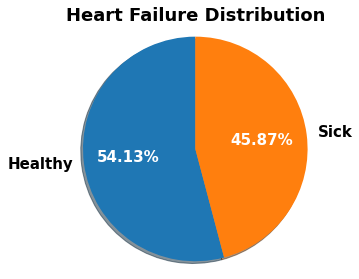

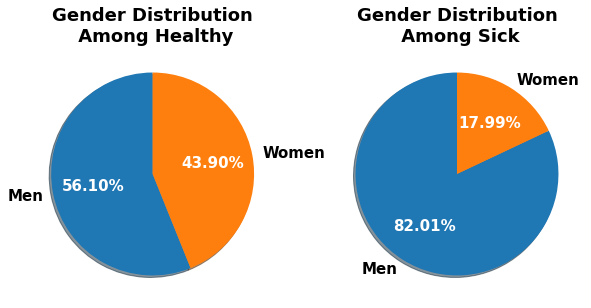

In [11]:
labels = ["Healthy", "Sick"]
total_count = len(dataset)
percent = [healthy/total_count, sick/total_count]
fig1, ax1 = plt.subplots(figsize=(4.5,4.5))
patches, texts, autotexts  = ax1.pie(percent, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

ax1.set_title("Heart Failure Distribution", fontsize = 18, fontweight = "bold")

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


labels = ["Men", "Women"]
total_count = len(dataset)
percent = [healthy_men/healthy, healthy_women/healthy]
percent2 = [sick_men/sick, sick_women/sick]

fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
patches, texts, autotexts  = ax1.pie(percent, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
ax1.set_title("Gender Distribution\n Among Healthy", fontsize = 18, fontweight = "bold")

    
patches, texts, autotexts  = ax2.pie(percent2, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

ax2.set_title("Gender Distribution\n Among Sick", fontsize = 18, fontweight = "bold")

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()